In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Indiana DCS.csv')

In [3]:
df.head()

,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,ASSESSMENT_DECISION,SUBSTANTIATED,PARTICIPANT,AGE
0,1406424407,1/1/19 0:32,0019-01-01 00:32:00.000,Kosciusko,Screen In,5 days,neglect,withdrawn,0,Victim,11
1,490485216,1/1/19 7:16,0019-01-01 07:16:00.000,Lake,Screen In,24 hours,"neglect,physical abuse",accepted,1,Victim,0
2,1773822066,1/1/19 11:34,0019-01-01 11:34:00.000,Marion,Screen In,24 hours,neglect,accepted,0,Victim,9
3,9124632,1/1/19 13:22,0019-01-01 13:22:00.000,Lake,Screen In,24 hours,neglect,accepted,0,Victim,5
4,2067805478,1/1/19 18:41,0019-01-01 18:41:00.000,Ripley,Screen In,24 hours,"neglect,physical abuse",accepted,0,Victim,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402070 entries, 0 to 402069
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   REF_ID               402070 non-null  int64 
 1   REPORT_DATE_RAW      402070 non-null  object
 2   DATETIME             402070 non-null  object
 3   COUNTY               402070 non-null  object
 4   DECISION             402070 non-null  object
 5   RESPONSE_TIME        402070 non-null  object
 6   ASM_MALTREATMENT     382837 non-null  object
 7   ASSESSMENT_DECISION  402070 non-null  object
 8   SUBSTANTIATED        402070 non-null  int64 
 9   PARTICIPANT          402070 non-null  object
 10  AGE                  402070 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 33.7+ MB


In [5]:
df.describe()

,REF_ID,SUBSTANTIATED,AGE
count,4.020700e+05,402070.000000,402070.000000
mean,1.074053e+09,0.134509,6.854249
std,6.200160e+08,0.341199,5.471858
min,8.637000e+03,0.000000,0.000000
25%,5.373301e+08,0.000000,1.000000
50%,1.074143e+09,0.000000,7.000000
75%,1.611062e+09,0.000000,12.000000
max,2.147483e+09,1.000000,49.000000


In [6]:
df.columns

Index(['REF_ID', 'REPORT_DATE_RAW', 'DATETIME', 'COUNTY', 'DECISION',
       'RESPONSE_TIME', 'ASM_MALTREATMENT', 'ASSESSMENT_DECISION',
       'SUBSTANTIATED', 'PARTICIPANT', 'AGE'],
      dtype='object')

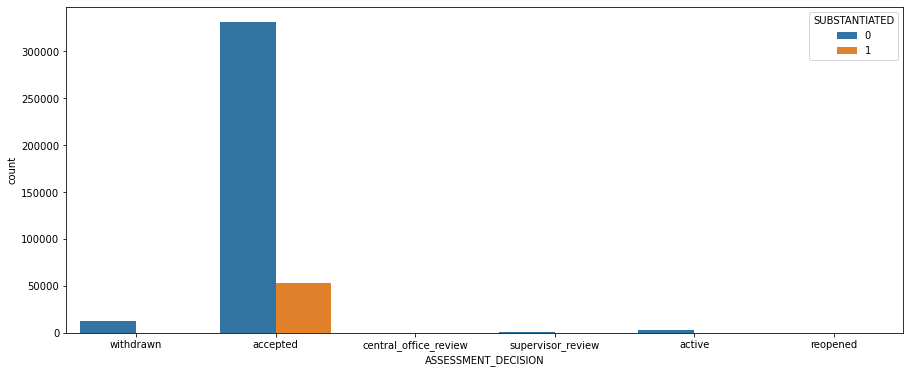

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(x='ASSESSMENT_DECISION', hue= 'SUBSTANTIATED', data=df)

In [8]:
df['ASSESSMENT_DECISION'].value_counts(normalize=True)

accepted                 0.955513
withdrawn                0.031604
active                   0.009200
supervisor_review        0.003368
central_office_review    0.000296
reopened                 0.000020
Name: ASSESSMENT_DECISION, dtype: float64

In [9]:
df['SUBSTANTIATED'].value_counts(normalize=True)

0    0.865491
1    0.134509
Name: SUBSTANTIATED, dtype: float64

In [10]:
pct_accep_sub=len(df[(df['ASSESSMENT_DECISION']=='accepted') &
       (df['SUBSTANTIATED']==1)])/len(df['ASSESSMENT_DECISION'])
print('Percentage of cases accepted and substantiated: {0:.0%}'.format(pct_accep_sub))

Percentage of cases accepted and substantiated: 13%


In [11]:
pct_accep_sub=len(df[(df['ASSESSMENT_DECISION']=='withdrawn') &
       (df['SUBSTANTIATED']==1)])/len(df['ASSESSMENT_DECISION'])
print('Percentage of cases withdrawn and substantiated: {0:.0%}'.format(pct_accep_sub))

Percentage of cases withdrawn and substantiated: 0%


In [12]:
df['ASSESSMENT_DECISION'] = df['ASSESSMENT_DECISION'].replace(dict.fromkeys(['central_office_review',
                                                                             'supervisor_review', 'active',
                                                                            'reopened'], 'withdrawn'))

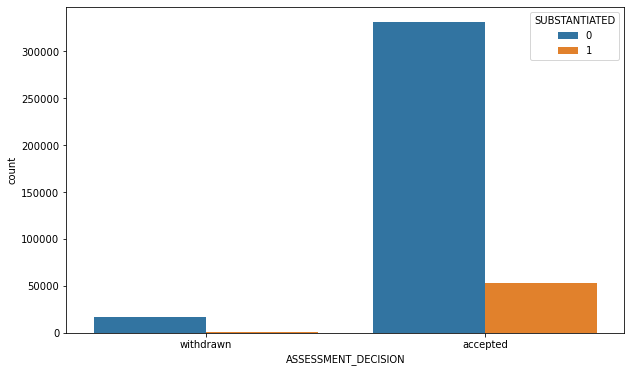

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='ASSESSMENT_DECISION', hue= 'SUBSTANTIATED', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90b9ddec70>]],
      dtype=object)

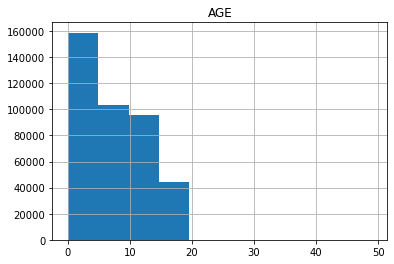

In [14]:
df.hist(['AGE'])

In [15]:
df.drop(df[df['AGE'] > 18].index, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90b9b8cc70>]],
      dtype=object)

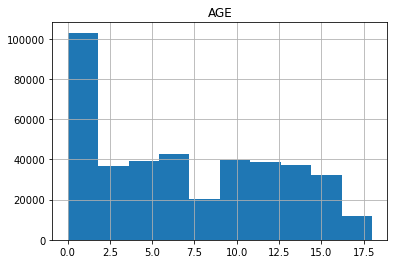

In [16]:
df.hist(['AGE'])

In [17]:
df['CHILD_TYPE'] = ['Small child' if x <= 9 else 'Big child' for x in df['AGE']]

In [18]:
df["CHILD_TYPE"].value_counts(normalize=True)

Small child    0.652364
Big child      0.347636
Name: CHILD_TYPE, dtype: float64

In [19]:
df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=[-np.inf, 0, 3, 6, 9, 12, 15, 18],
                        labels=['infant', '0-3', '3-6', '6-9', '9-12', '12-15', '15-18'])
df[['AGE', 'AGE_BINS']].head()

,AGE,AGE_BINS
0,11,9-12
1,0,infant
2,9,6-9
3,5,3-6
4,4,3-6


In [20]:
df['AGE_BINS'].value_counts(normalize=True)

infant    0.211123
6-9       0.152779
3-6       0.151565
9-12      0.144809
0-3       0.136899
12-15     0.135871
15-18     0.066956
Name: AGE_BINS, dtype: float64

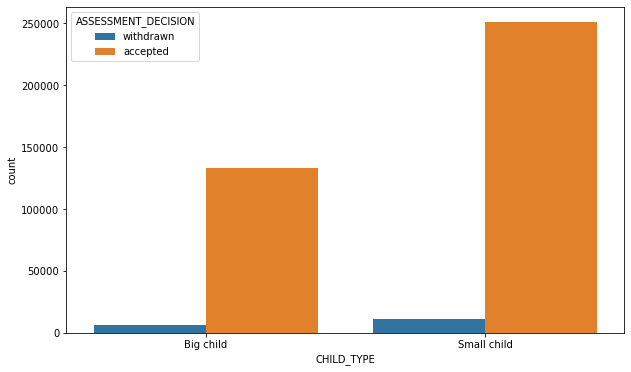

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='CHILD_TYPE', hue= 'ASSESSMENT_DECISION', data=df)

In [22]:
pct_accep_small_child=len(df[(df['CHILD_TYPE']=='Small child') &
       (df['ASSESSMENT_DECISION']=='accepted')])/len(df['CHILD_TYPE'])
print('Percentage of small child cases accepted: {0:.0%}'.format(pct_accep_small_child))

Percentage of small child cases accepted: 62%


In [23]:
pct_accep_big_child=len(df[(df['CHILD_TYPE']=='Big child') &
       (df['ASSESSMENT_DECISION']=='accepted')])/len(df['CHILD_TYPE'])
print('Percentage of big child cases accepted: {0:.0%}'.format(pct_accep_big_child))

Percentage of big child cases accepted: 33%


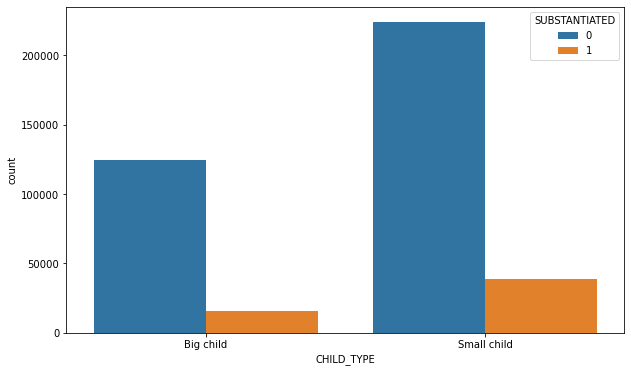

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='CHILD_TYPE', hue= 'SUBSTANTIATED', data=df)

In [25]:
pct_sub_small_child=len(df[(df['CHILD_TYPE']=='Small child') &
       (df['SUBSTANTIATED']==1)])/len(df['CHILD_TYPE'])
print('Percentage of small child cases substantiated: {0:.0%}'.format(pct_sub_small_child))

Percentage of small child cases substantiated: 10%


In [26]:
pct_sub_big_child=len(df[(df['CHILD_TYPE']=='Big child') &
       (df['SUBSTANTIATED']==1)])/len(df['CHILD_TYPE'])
print('Percentage of big child cases substantiated: {0:.0%}'.format(pct_sub_big_child))

Percentage of big child cases substantiated: 4%


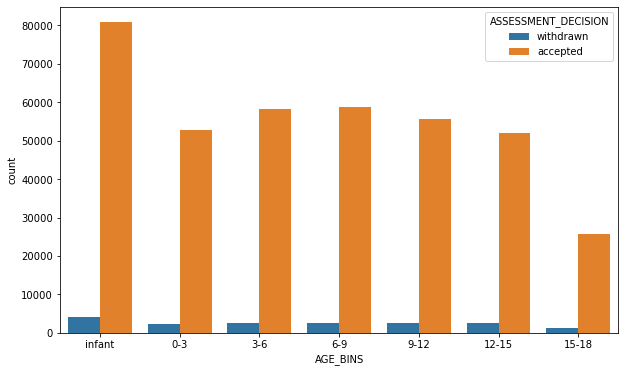

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='AGE_BINS', hue= 'ASSESSMENT_DECISION', data=df)

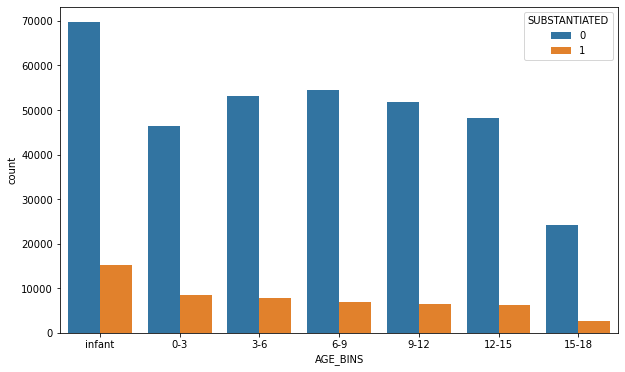

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='AGE_BINS', hue= 'SUBSTANTIATED', data=df)

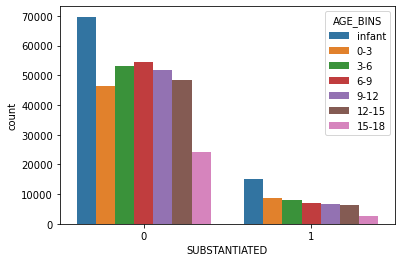

In [29]:
sns.countplot(x='SUBSTANTIATED',data=df, hue='AGE_BINS')

In [30]:
pct_inf_sub=len(df[(df['AGE_BINS']=='infant') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_03_sub=len(df[(df['AGE_BINS']=='0-3') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_36_sub=len(df[(df['AGE_BINS']=='3-6') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_69_sub=len(df[(df['AGE_BINS']=='6-9') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_912_sub=len(df[(df['AGE_BINS']=='9-12') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_1215_sub=len(df[(df['AGE_BINS']=='12-15') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])
pct_1518_sub=len(df[(df['AGE_BINS']=='15-18') & (df['SUBSTANTIATED']==1)])/len(df['AGE_BINS'])

In [31]:
print('Percentage of infant cases substantiated: {0:.0%}'.format(pct_inf_sub))
print('Percentage of 0-3 year old cases substantiated: {0:.0%}'.format(pct_03_sub))
print('Percentage of 3-6 year old cases substantiated: {0:.0%}'.format(pct_36_sub))
print('Percentage of 6-9 year old cases substantiated: {0:.0%}'.format(pct_69_sub))
print('Percentage of 9-12 year old cases substantiated: {0:.0%}'.format(pct_912_sub))
print('Percentage of 12-15 year old cases substantiated: {0:.0%}'.format(pct_1215_sub))
print('Percentage of 15-18 year old cases substantiated: {0:.0%}'.format(pct_1518_sub))

Percentage of infant cases substantiated: 4%
Percentage of 0-3 year old cases substantiated: 2%
Percentage of 3-6 year old cases substantiated: 2%
Percentage of 6-9 year old cases substantiated: 2%
Percentage of 9-12 year old cases substantiated: 2%
Percentage of 12-15 year old cases substantiated: 2%
Percentage of 15-18 year old cases substantiated: 1%


In [32]:
df['ASM_MALTREATMENT'].value_counts(normalize=True)

neglect                                                         0.666127
neglect,physical abuse                                          0.157680
physical abuse                                                  0.054645
sexual abuse                                                    0.048806
neglect,sexual abuse                                            0.044643
neglect,physical abuse,sexual abuse                             0.020770
physical abuse,sexual abuse                                     0.004441
human/sexual trafficking,neglect,sexual abuse                   0.001191
human/sexual trafficking,sexual abuse                           0.000643
human/sexual trafficking,neglect,physical abuse,sexual abuse    0.000630
human/sexual trafficking,neglect                                0.000212
human/sexual trafficking                                        0.000089
human/sexual trafficking,physical abuse,sexual abuse            0.000065
human/sexual trafficking,neglect,physical abuse    

In [33]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['neglect', 'neglect, physical abuse',
                                                                       'physical abuse', 'sexual abuse',
                                                                       'neglect,sexual abuse',
                                                                       'neglect,physical abuse,sexual abuse',
                                                                      'physical abuse,sexual abuse',
                                                                      'neglect,physical abuse'],
                                                                      'Neglect/Physical/Sexual Abuse'))

In [34]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['human/sexual trafficking,neglect,sexual abuse',
                                                                      'human/sexual trafficking,sexual abuse',
                                                                      'human/sexual trafficking,neglect,physical abuse,sexual abuse',
                                                                      'human/sexual trafficking,neglect',
                                                                      'human/sexual trafficking',
                                                                      'human/sexual trafficking,physical abuse,sexual abuse',
                                                                      'human/sexual trafficking,neglect,physical abuse',
                                                                       'human/sexual trafficking,physical abuse'],
                                                                      'Human/Sexual Trafficking'))

In [35]:
df['ASM_MALTREATMENT'].value_counts(normalize=True)

Neglect/Physical/Sexual Abuse    0.997111
Human/Sexual Trafficking         0.002889
Name: ASM_MALTREATMENT, dtype: float64

In [36]:
df.groupby(df['ASSESSMENT_DECISION']).count()

,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,SUBSTANTIATED,PARTICIPANT,AGE,CHILD_TYPE,AGE_BINS
ASSESSMENT_DECISION,,,,,,,,,,,,
accepted,384133,384133,384133,384133,384133,384133,370856,384133,384133,384133,384133,384133
withdrawn,17880,17880,17880,17880,17880,17880,11963,17880,17880,17880,17880,17880


In [37]:
df.groupby(df['SUBSTANTIATED']).count()

,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,ASSESSMENT_DECISION,PARTICIPANT,AGE,CHILD_TYPE,AGE_BINS
SUBSTANTIATED,,,,,,,,,,,,
0,347938,347938,347938,347938,347938,347938,330778,347938,347938,347938,347938,347938
1,54075,54075,54075,54075,54075,54075,52041,54075,54075,54075,54075,54075


In [38]:
df['COUNTY'].nunique()

93

In [39]:
df['COUNTY'].unique()

array(['Kosciusko', 'Lake', 'Marion', 'Ripley', 'Grant', 'Laporte',
       'Bartholomew', 'Elkhart', 'Tippecanoe', 'Delaware', 'Hendricks',
       'Scott', 'Allen', 'Henry', 'Johnson', 'Adams', 'Miami',
       'Washington', 'Noble', 'Posey', 'Saint Joseph', 'Pulaski',
       'Vanderburgh', 'Howard', 'Madison', 'Greene', 'Marshall', 'Floyd',
       'Boone', 'Wayne', 'Tipton', 'Cass', 'Morgan', 'Hancock', 'Starke',
       'Harrison', 'Perry', 'Monroe', 'Dearborn', 'Clark', 'Vigo',
       'Whitley', 'Clay', 'Sullivan', 'Montgomery', 'Institutional Unit',
       'Brown', 'Owen', 'Crawford', 'Porter', 'Putnam', 'Dubois', 'Union',
       'Knox', 'Jackson', 'Wells', 'Randolph', 'Orange', 'Spencer',
       'Warrick', 'Hamilton', 'Fountain', 'Carroll', 'Steuben',
       'Switzerland', 'Pike', 'Shelby', 'Fulton', 'Gibson', 'Clinton',
       'Lawrence', 'Wabash', 'Fayette', 'Parke', 'Jennings', 'Martin',
       'Huntington', 'Dekalb', 'LaGrange', 'Decatur', 'White',
       'Jefferson', 'Daviess',

In [40]:
df['COUNTY'] = df['COUNTY'].replace(dict.fromkeys(['Lake', 'Porter', 'La Porte', 'Newton', 'Jasper',
                                                   'Elkhart', 'Fulton', 'Kosciusko', 'LaGrange', 'Marshall',
                                                   'Pulaski', 'St. Joseph', 'Starke', 'Adams', 'Allen',
                                                   'DeKalb', 'Huntington', 'Noble', 'Steuben', 'Wabash',
                                                   'Wells', 'Whitley', 'Benton', 'Cass', 'Miami', 'White',
                                                   'Saint Joseph', 'Laporte', 'Howard', 'Grant', 'Dekalb',
                                                   'Carroll', 'Blackford', 'Jay'], 'Northern'))

In [41]:
df['COUNTY'] = df['COUNTY'].replace(dict.fromkeys(['Clark', 'Crawford', 'Daviess', 'Dearborn', 'Dubois', 
                                                   'Floyd', 'Gibson', 'Harrison', 'Jackson', 'Jefferson', 
                                                   'Knox', 'Lawrence', 'Martin', 'Ohio', 'Orange', 'Perry',
                                                   'Pike','Posey', 'Ripley', 'Scott', 'Spencer', 'Switzerland',
                                                   'Vanderburgh', 'Warrick', 'Washington', 'Jennings'], 'Southern'))

In [42]:
df['COUNTY'] = df['COUNTY'].replace(dict.fromkeys(['Bartholomew', 'Boone', 'Brown', 'Clay', 'Clinton',
                                                   'Decatur', 'Delaware', 'Fountain', 'Franklin', 'Greene',
                                                   'Hamilton', 'Hancock', 'Hendricks', 'Henry', 'Johnson',
                                                   'Madison', 'Marion', 'Monroe', 'Montgomery', 'Morgan',
                                                   'Owen', 'Parke', 'Putnam', 'Randolph', 'Rush', 'Shelby',
                                                   'Sullivan', 'Tippecanoe', 'Tipton', 'Union', 'Vermillion',
                                                   'Vigo', 'Wayne', 'Fayette', 'Warren'], 'Central'))

In [43]:
df['COUNTY'].value_counts(normalize=True)

Central               0.482514
Northern              0.340996
Southern              0.163947
Institutional Unit    0.012542
Name: COUNTY, dtype: float64

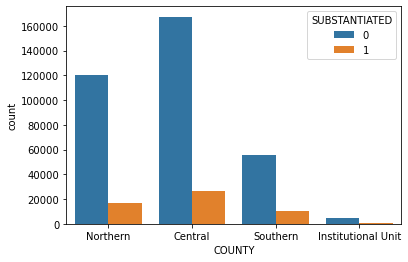

In [44]:
sns.countplot(x='COUNTY', hue='SUBSTANTIATED', data=df)

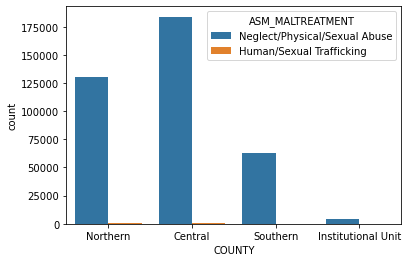

In [45]:
sns.countplot(x='COUNTY', hue='ASM_MALTREATMENT', data=df)

In [46]:
df['RESPONSE_TIME'].value_counts()

24 hours    233142
5 days      124910
2 hours      30479
1 hour       13482
Name: RESPONSE_TIME, dtype: int64

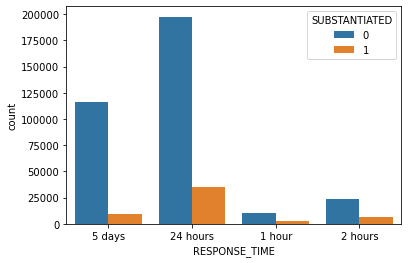

In [47]:
sns.countplot(x='RESPONSE_TIME',data=df, hue='SUBSTANTIATED')

In [48]:
pct_5t = len(df[df['RESPONSE_TIME']=='5 days'])/len(df['RESPONSE_TIME'])
pct_24t = len(df[df['RESPONSE_TIME']=='24 hours'])/len(df['RESPONSE_TIME'])
pct_1t = len(df[df['RESPONSE_TIME']=='1 hour'])/len(df['RESPONSE_TIME'])
pct_2t = len(df[df['RESPONSE_TIME']=='2 hours'])/len(df['RESPONSE_TIME'])

In [49]:
print('Percentage of total cases with a response time of 5 days: {0:.0%}'.format(pct_5t))
print('Percentage of total cases with a response time of 24 hours: {0:.0%}'.format(pct_24t))
print('Percentage of total cases with a response time of 1 hour: {0:.0%}'.format(pct_1t))
print('Percentage of total cases with a response time of 2 hours: {0:.0%}%'.format(pct_2t))

Percentage of total cases with a response time of 5 days: 31%
Percentage of total cases with a response time of 24 hours: 58%
Percentage of total cases with a response time of 1 hour: 3%
Percentage of total cases with a response time of 2 hours: 8%%


In [50]:
pct_5 = len(df[(df['RESPONSE_TIME']=='5 days') & (df['SUBSTANTIATED']==1)])/len((df[df['RESPONSE_TIME']=='5 days']))
pct_24 = len(df[(df['RESPONSE_TIME']=='24 hours') & (df['SUBSTANTIATED']==1)])/len((df[df['RESPONSE_TIME']=='24 hours']))
pct_1 = len(df[(df['RESPONSE_TIME']=='1 hour') & (df['SUBSTANTIATED']==1)])/len((df[df['RESPONSE_TIME']=='1 hour']))
pct_2 = len(df[(df['RESPONSE_TIME']=='2 hours') & (df['SUBSTANTIATED']==1)])/len((df[df['RESPONSE_TIME']=='2 hours']))

In [51]:
print('Percentage of substantiated cases with a response time of 5 days: {0:.0%}'.format(pct_5))
print('Percentage of substantiated cases with a response time of 24 hours: {0:.0%}'.format(pct_24))
print('Percentage of substantiated cases with a response time of 1 hour: {0:.0%}'.format(pct_1))
print('Percentage of substantiated cases with a response time of 2 hours: {0:.0%}'.format(pct_2))

Percentage of substantiated cases with a response time of 5 days: 7%
Percentage of substantiated cases with a response time of 24 hours: 15%
Percentage of substantiated cases with a response time of 1 hour: 22%
Percentage of substantiated cases with a response time of 2 hours: 21%


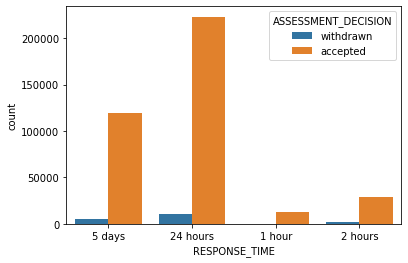

In [52]:
sns.countplot(x='RESPONSE_TIME',data=df, hue='ASSESSMENT_DECISION')

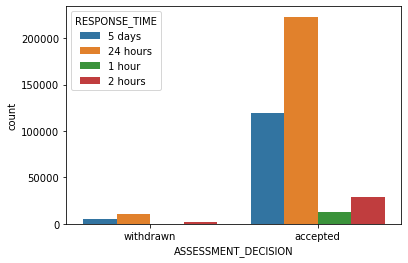

In [53]:
sns.countplot(x='ASSESSMENT_DECISION',data=df, hue='RESPONSE_TIME')